<a href="https://colab.research.google.com/github/2j0123/WASSUP_Project_Team7_2/blob/JS/Drug_Data_EDA_Preprocess_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drug Dataset EDA

In [4]:
import pandas as pd

In [5]:
drug_data = pd.read_csv('/home/kdt-admin/miniconda3/envs/JS/WASSUP_Project_Team7_2/drugsComTrain_raw.csv')

## 기초 EDA

### 데이터 프레임 head

In [6]:
drug_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


### 데이터 프레임 info

In [7]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


### 'condition' 컬럼의 Value 확인

In [8]:
drug_data['condition'].value_counts()

condition
Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: count, Length: 884, dtype: int64

### 'rating' 컬럼의 평균/최소/최대 확인

In [9]:
drug_data['rating'].describe()

count    161297.000000
mean          6.994377
std           3.272329
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

## 결측치

### 결측치 확인

In [10]:
drug_data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

### 결측치 시각화

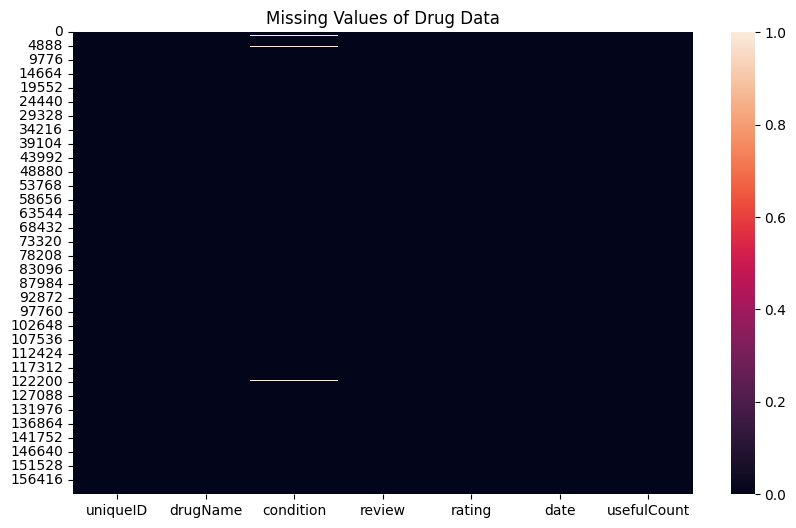

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(drug_data.isnull())
plt.title('Missing Values of Drug Data')
plt.show()

## EDA

### 'rating' 컬럼 빈도

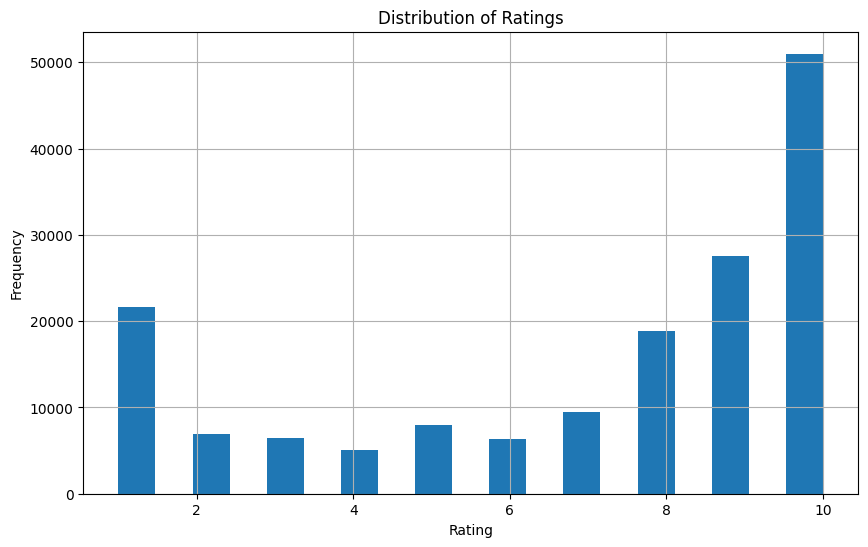

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(drug_data['rating'], bins=19)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 'condition' 컬럼의 상위 10가지 빈도 수

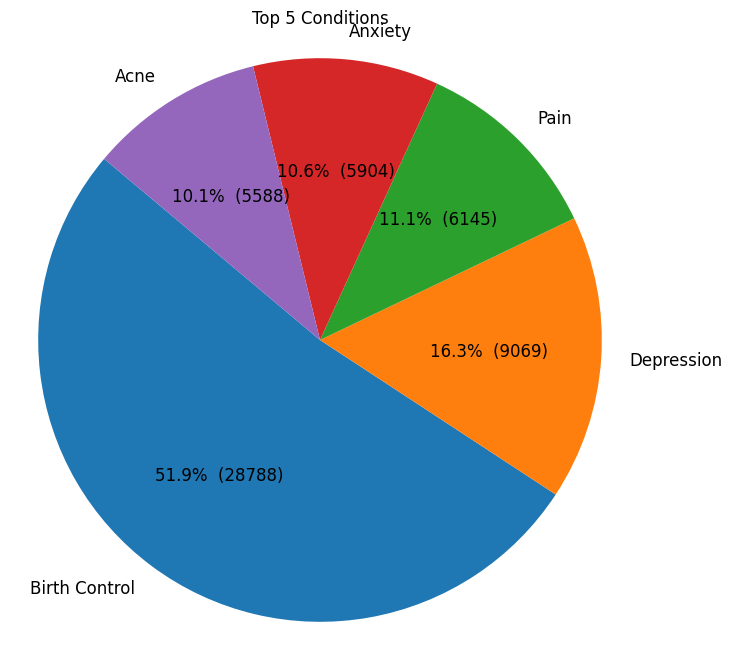

In [13]:
top5_conditions = drug_data['condition'].value_counts().head(5)

# 시각화
plt.figure(figsize=(8, 8))
plt.pie(top5_conditions.values, labels=top5_conditions.index, autopct=lambda p: '{:.1f}%  ({:.0f})'.format(p, p * sum(top5_conditions)/100),
        startangle=140, textprops={'fontsize': 12})
plt.title('Top 5 Conditions')
plt.axis('equal')
plt.show()

### 'drugNames' 컬럼의 상위 5가지 빈도수

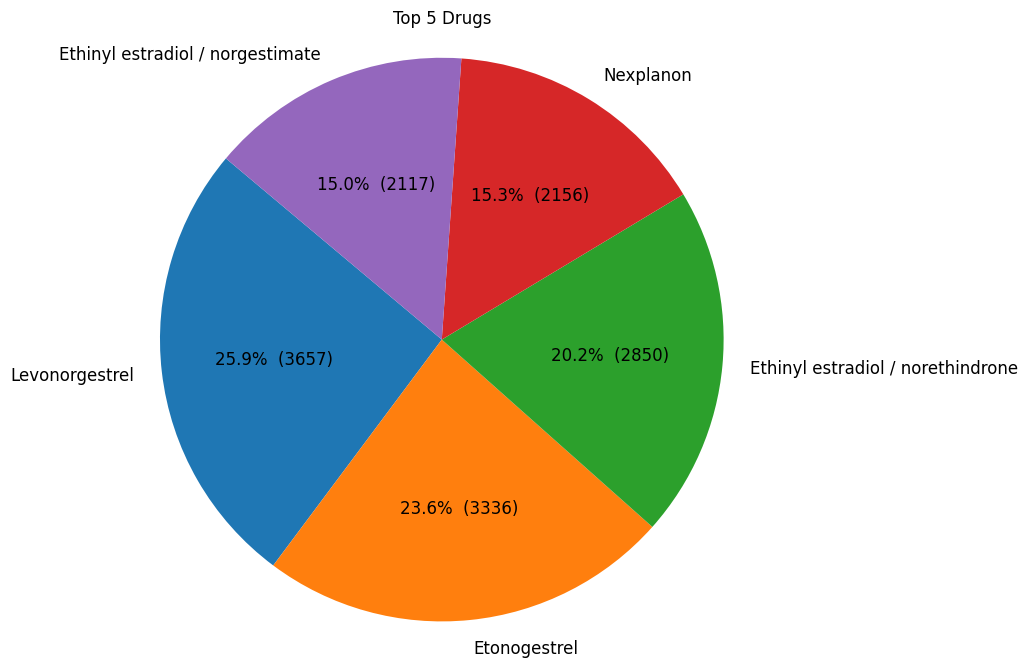

In [14]:
top5_drugNames = drug_data['drugName'].value_counts().head(5)

# 시각화
plt.figure(figsize=(8, 8))
plt.pie(top5_drugNames.values, labels=top5_drugNames.index, autopct=lambda p: '{:.1f}%  ({:.0f})'.format(p, p * sum(top5_drugNames)/100),
        startangle=140, textprops={'fontsize': 12})
plt.title('Top 5 Drugs')
plt.axis('equal')
plt.show()

### 'rating' 컬럼과 'usefulCount' 컬럼 상관관계

상관계수: 0.23418537506366544


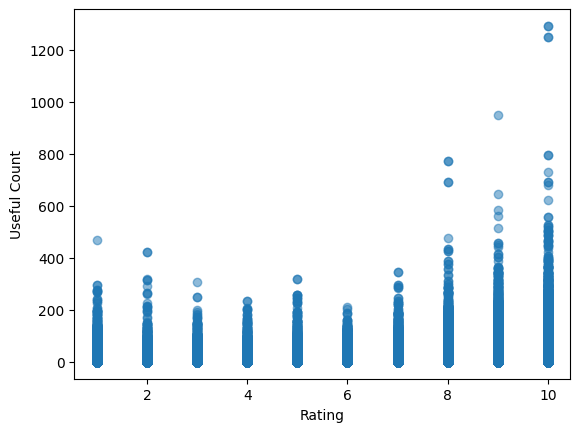

In [15]:
import numpy as np

rating = drug_data['rating']
useful_count = drug_data['usefulCount']

correlation = np.corrcoef(rating, useful_count)[0, 1]
print("상관계수:", correlation)

#시각화
plt.scatter(rating, useful_count, alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.show()

In [21]:
from nltk.corpus import stopwords
import re
import nltk
from collections import Counter

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 'review' 컬럼을 하나의 문자열로 결합
all_reviews = ' '.join(drug_data['review'])

# 소문자 변환
all_reviews = all_reviews.lower()
# 특수 문자 제거
all_reviews = re.sub(r'[^a-zA-Z\s]', '', all_reviews)
# 불용어 제거
filtered_words = [word for word in all_reviews.split() if word not in stop_words]

# 빈도 계산
word_counts = Counter(filtered_words)

# 가장 많이 등장하는 단어 상위 10개 추출
top_words = word_counts.most_common(10)

for word, count in top_words:
    print(f"{word}: {count}")

[nltk_data] Downloading package stopwords to /home/kdt-
[nltk_data]     admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


day: 55942
im: 55126
side: 52593
taking: 51266
years: 46699
ive: 46592
pain: 45007
first: 44950
effects: 44202
mg: 43920


### 'rating' 컬럼의 긍정/부정

In [250]:
feeling = [0 if rating in range(0,6) else 1 for rating in drug_data['rating']]
pos_cnt = len([x for x in feeling if x==1])
neg_cnt = len([x for x in feeling if x==0])
print(("긍정비율 : {:.4f}%,".format(pos_cnt/len(feeling))+" 긍정개수 : {}개".format(pos_cnt)))
print(("부정비율 : {:.4f}%,".format(neg_cnt/len(feeling))+" 부정개수 : {}개".format(neg_cnt)))

긍정비율 : 0.7019%, 긍정개수 : 113209개
부정비율 : 0.2981%, 부정개수 : 48088개


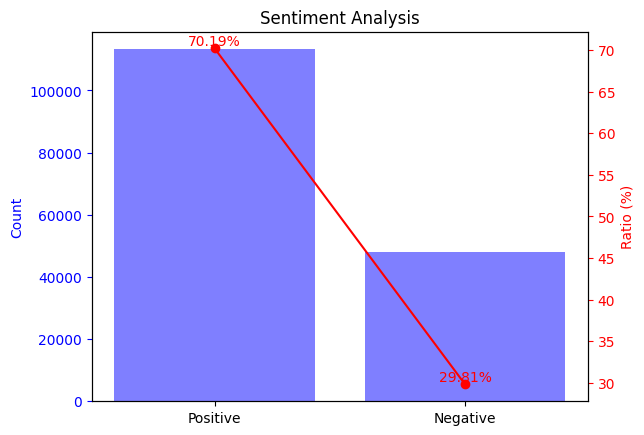

In [253]:
pos_ratio = pos_cnt / len(feeling) * 100
neg_ratio = neg_cnt / len(feeling) * 100

labels = ['Positive', 'Negative']
count = [pos_cnt, neg_cnt]
ratio = [pos_ratio, neg_ratio]

fig, ax1 = plt.subplots()

ax1.bar(labels, count, color='b', alpha=0.5)
ax1.set_ylabel('Count', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(labels, ratio, color='r', marker='o')
ax2.set_ylabel('Ratio (%)', color='r')
ax2.tick_params('y', colors='r')

for i, r in enumerate(ratio):
    ax2.text(i, r, f'{r:.2f}%', color='r', ha='center', va='bottom')

plt.title('Sentiment Analysis')
plt.show()

### fix_date와 rating의 상관관계

In [25]:
drug_data['fixed_date'] = pd.to_datetime(drug_data['date'])
rating_date_data = drug_data[['rating', 'fixed_date']]
rating_date_data['year_month'] = rating_date_data['fixed_date'].dt.to_period('M')
rating_date_data['year_month_numeric'] = rating_date_data['fixed_date'].dt.year * 12 + rating_date_data['fixed_date'].dt.month
mean_rating_by_month = rating_date_data.groupby('year_month_numeric')['rating'].mean()
correlation = rating_date_data['year_month_numeric'].corr(rating_date_data['rating'])

print("상관계수:", correlation)

<ipython-input-25-3e324fcf5e10>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  drug_data['fixed_date'] = pd.to_datetime(drug_data['date'])


상관계수: -0.19671610862182823


<ipython-input-25-3e324fcf5e10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_date_data['year_month'] = rating_date_data['fixed_date'].dt.to_period('M')
<ipython-input-25-3e324fcf5e10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_date_data['year_month_numeric'] = rating_date_data['fixed_date'].dt.year * 12 + rating_date_data['fixed_date'].dt.month


In [26]:
print("상관계수:", correlation)

상관계수: -0.19671610862182823
